<b> Extracting and Utilizing GEDI Data Stored on Sherwood </b>

The purpose of this notebook is to outline how to access the GEDI Level 2B Data located on Sherwood, both directly via the h5py library and indirectly through postgres queries, which are considerably faster for running spatial and temporal queries. 

Initially, to directly access these files, we'll change the current directory to the location of the L2B Data, and list any files that match the expected file name syntax.

In [1]:
import os
import h5py
import pandas as pd
os.chdir('/maps/forecol/data/GEDI/level2B')
current_path = os.getcwd()
current_path

'/maps-priv/maps/forecol/data/GEDI/level2B'

In [2]:
gediFiles = [g for g in os.listdir() if g.startswith('GEDI02_B') and g.endswith('.h5')]
gediFiles

['GEDI02_B_2021322174035_O16623_01_T07632_02_003_01_V002.h5',
 'GEDI02_B_2022058021612_O18179_01_T02032_02_003_01_V002.h5',
 'GEDI02_B_2022072204314_O18408_01_T00701_02_003_01_V002.h5',
 'GEDI02_B_2019294063702_O04850_01_T05582_02_003_01_V002.h5',
 'GEDI02_B_2022027032528_O17699_04_T01673_02_003_01_V002.h5',
 'GEDI02_B_2021131101046_O13658_04_T04580_02_003_01_V002.h5',
 'GEDI02_B_2020311115609_O10776_04_T11282_02_003_01_V002.h5',
 'GEDI02_B_2022014085738_O17501_03_T05774_02_003_01_V002.h5',
 'GEDI02_B_2020196095931_O08992_03_T03540_02_003_01_V002.h5',
 'GEDI02_B_2021070214443_O12720_01_T07311_02_003_01_V002.h5',
 'GEDI02_B_2022097224744_O18797_04_T09874_02_003_01_V002.h5',
 'GEDI02_B_2019180171027_O03088_04_T00679_02_003_01_V002.h5',
 'GEDI02_B_2021091144725_O13041_01_T05950_02_003_01_V002.h5',
 'GEDI02_B_2021035114122_O12171_01_T00655_02_003_01_V002.h5',
 'GEDI02_B_2021264190341_O15725_01_T10755_02_003_01_V002.h5',
 'GEDI02_B_2020211165002_O09229_01_T04757_02_003_01_V002.h5',
 'GEDI02

A single file, or 'granule', contains data from one trajectory. The topmost column contained within a granule provides 8 beams, the first four of which (labeled 0000 through 0011) are obtained from the coverage laser while the latter four (labeled 0100 through 0111) are obtained from the two full power lasers. As a quick experiment, we'll extract data from one of these beams and plot PAI against latitude. 

In [6]:
test = gediFiles[13]
granule = h5py.File(test, 'r')

granule

<HDF5 file "GEDI02_B_2021035114122_O12171_01_T00655_02_003_01_V002.h5" (mode r)>

In [7]:
lats = granule["BEAM0000"]["geolocation"]["lat_lowestmode"][()]
lons = granule["BEAM0000"]["geolocation"]["lon_lowestmode"][()]
pai = granule["BEAM0000"]["pai"][()]
shots = granule["BEAM0000"]["geolocation"]["shot_number"][()]

In [8]:
shotSample, lonSample, latSample, beamSample, paiSample = [], [], [], [], []

for i in range(len(shots)):
    if i % 100 == 0:
        shotSample.append(str(shots[i]))
        lonSample.append(lons[i])
        latSample.append(lats[i])
        paiSample.append(pai[i])
        beamSample.append('BEAM0000')

In [9]:
latslons = pd.DataFrame({'Beam': beamSample, 'Shot Number': shotSample, 'Longitude': lonSample, 'Latitude': latSample,
                         'Plant Area Index': paiSample})
latslons

,Beam,Shot Number,Longitude,Latitude,Plant Area Index
0,BEAM0000,121710000100000001,-95.794457,-48.625195,-9999.000000
1,BEAM0000,121710000100000101,-95.757118,-48.615487,-9999.000000
2,BEAM0000,121710000100000201,-95.721311,-48.606174,-9999.000000
3,BEAM0000,121710000100000301,-95.685452,-48.596793,-9999.000000
4,BEAM0000,121710000100000401,-95.649690,-48.587377,-9999.000000
...,...,...,...,...,...
1358,BEAM0000,121710000100135801,-37.297468,-0.168907,0.128540
1359,BEAM0000,121710000100135901,-37.267450,-0.126376,-9999.000000
1360,BEAM0000,121710000100136001,-37.237521,-0.083792,0.311599
1361,BEAM0000,121710000100136101,-37.207870,-0.041632,0.369939


In [12]:
latslons_filt = latslons[latslons["Plant Area Index"] > -9999]
latslons_filt 

,Beam,Shot Number,Longitude,Latitude,Plant Area Index
10,BEAM0000,121710000100001001,-95.434814,-48.529371,0.028371
11,BEAM0000,121710000100001101,-95.391240,-48.517815,0.028710
12,BEAM0000,121710000100001201,-95.319899,-48.498835,0.136280
13,BEAM0000,121710000100001301,-95.248644,-48.479780,0.118274
14,BEAM0000,121710000100001401,-95.177369,-48.460750,0.044943
...,...,...,...,...,...
1357,BEAM0000,121710000100135701,-37.327439,-0.211479,0.056564
1358,BEAM0000,121710000100135801,-37.297468,-0.168907,0.128540
1360,BEAM0000,121710000100136001,-37.237521,-0.083792,0.311599
1361,BEAM0000,121710000100136101,-37.207870,-0.041632,0.369939


<AxesSubplot:xlabel='Latitude'>

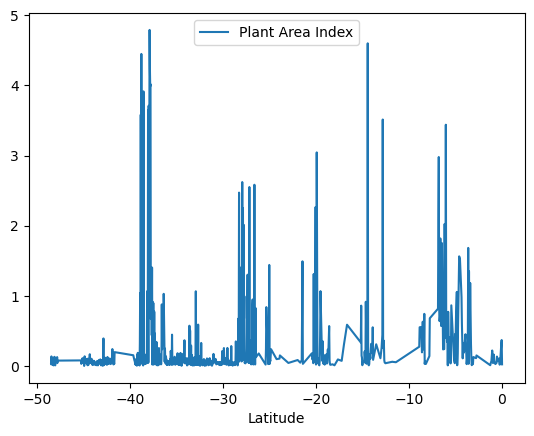

In [14]:
latslons_filt.plot(x = "Latitude", y = "Plant Area Index")

To spatially query effectively, we'll use the established postgres server, which requires gedi_database.py, constants.py, and logging_util.py to be in the same directory as this notebook. If these are present, we can import the class GediDatabase, which can then be queried. 

In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

shape = gpd.read_file("Amazonia_drought_gradient_polygons/Amazonia_drought_gradient_polygons.shp")

In [7]:
from gedi_database import GediDatabase

database = GediDatabase()

/home/og309/gedi_database.py:64: SAWarning: Did not recognize type 'geometry' of column 'geometry'
  col["name"] for col in self.inspector.get_columns(table_name)
/home/og309/gedi_database.py:64: SAWarning: Did not recognize type 'geometry' of column 'geom_4326'
  col["name"] for col in self.inspector.get_columns(table_name)


In [8]:
gedi_shots_gdf = database.query(
    table_name = "level_2b",
    columns = [
        "shot_number",
        "lat_lowestmode",
        "lon_lowestmode",
        "pai"
    ],
    geometry = shape.geometry,
    crs = shape.crs,
    start_time = f"2019-01-01",
    end_time = f"2023-01-01",

    use_geopandas = True
)

In [11]:
shots_filt = gedi_shots_gdf[gedi_shots_gdf["pai"] > -9999]
shots_filt 

,shot_number,lat_lowestmode,lon_lowestmode,pai,geometry
0,179590000400365222,-2.162917,-73.881627,2.688921,POINT (-73.88163 -2.16292)
1,187370300400248605,-2.163626,-73.867399,5.134085,POINT (-73.86740 -2.16363)
2,187370300400248603,-2.162778,-73.867992,4.132288,POINT (-73.86799 -2.16278)
3,187370300400248602,-2.162365,-73.868288,3.245847,POINT (-73.86829 -2.16236)
4,187370300400248593,-2.158576,-73.870956,3.025610,POINT (-73.87096 -2.15858)
...,...,...,...,...,...
1557980,110440000100054589,-0.727022,-73.646493,1.096999,POINT (-73.64649 -0.72702)
1557981,110440000100054582,-0.729980,-73.648528,1.941702,POINT (-73.64853 -0.72998)
1557982,66060600100279169,-0.730653,-73.649764,1.568396,POINT (-73.64976 -0.73065)
1557983,46451100400242453,-0.722827,-73.650848,4.749391,POINT (-73.65085 -0.72283)


<AxesSubplot:xlabel='lon_lowestmode', ylabel='lat_lowestmode'>

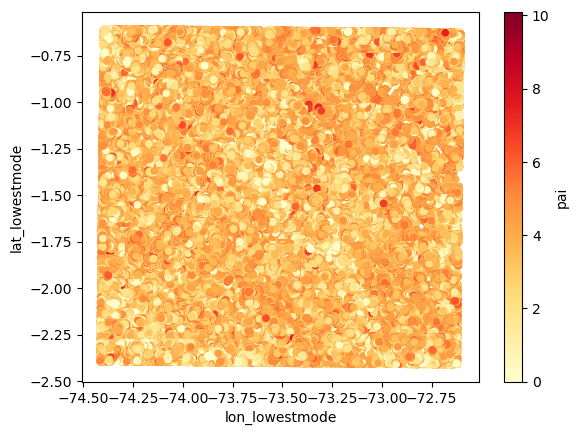

In [12]:
shots_filt.plot(x="lon_lowestmode", y="lat_lowestmode", kind="scatter", c="pai",
        colormap="YlOrRd")

<AxesSubplot:>

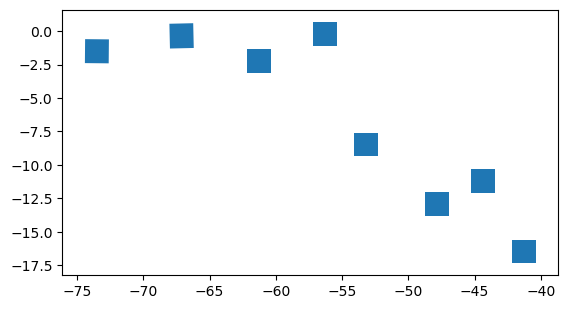

In [19]:
shape.plot()

In [22]:
def pai_yearly_trend(year):
    trend = []
    trend = np.array(trend)
    for month in range(1,13):
        current = database.query(
            table_name = "level_2b",
            columns = [
                "shot_number",
                "lat_lowestmode",
                "lon_lowestmode",
                "pai"
            ],
            geometry = shape.geometry,
            crs = shape.crs,
            start_time = f"{year}-{month}-01",
            end_time = f"{year if month < 12 else (year + 1)}-{(month + 1) if month < 12 else 1}-01",
            use_geopandas = True
        )
        if not current.empty:
            trend = np.append(trend, np.mean(current["pai"]))
        else:
            trend = np.append(trend, 0)
    return trend

In [24]:
pai_yearly_trend(2021)

array([3.45097238, 3.00249369, 3.34893068, 0.        , 3.55110333,
       3.69955744, 3.53031464, 3.63833894, 3.70223362, 0.        ,
       3.48499304, 3.45718561])